# Linear Wire Antennas

Begin by getting the library path

In [7]:
import lib_path

Set the frequency (Hz), the wire length (m) and the wire current (A)

In [8]:
frequency = 1e9

length = 0.4

current = 1.0

Set the angular span using the `linspace` routine from `scipy`

In [9]:
from scipy import linspace, finfo

from scipy.constants import pi


theta = linspace(finfo(float).eps, 2.0 * pi, 1000)

Calculate the antenna parameters and antenna pattern for either the infinitesimal dipole, small dipole or finitie length dipole

In [10]:
from Libs.antenna.wire_antenna import finite_length_dipole, infinitesimal_dipole, small_dipole


antenna_type = 'finite_length_dipole'


if antenna_type == 'infinitesimal_dipole':

    total_power_radiated = infinitesimal_dipole.radiated_power(frequency, length, current)

    radiation_resistance = infinitesimal_dipole.radiation_resistance(frequency, length)

    beamwidth = infinitesimal_dipole.beamwidth()

    directivity = infinitesimal_dipole.directivity()

    maximum_effective_aperture = infinitesimal_dipole.maximum_effective_aperture(frequency)

    _, et, _, _, _, _ = infinitesimal_dipole.far_field(frequency, length, current, 1e9, theta)
    
    

elif antenna_type == 'small_dipole':

    total_power_radiated = small_dipole.radiated_power(frequency, length, current)

    radiation_resistance = small_dipole.radiation_resistance(frequency, length)

    beamwidth = small_dipole.beamwidth()

    directivity = small_dipole.directivity()

    maximum_effective_aperture = small_dipole.maximum_effective_aperture(frequency)

    _, et, _, _, _, _ = small_dipole.far_field(frequency, length, current, 1e9, theta)
    
    

else:

    total_power_radiated = finite_length_dipole.radiated_power(frequency, length, current)

    radiation_resistance = finite_length_dipole.radiation_resistance(frequency, length)

    beamwidth = finite_length_dipole.beamwidth(frequency, length)

    directivity = finite_length_dipole.directivity(frequency, length, current)

    maximum_effective_aperture = finite_length_dipole.maximum_effective_aperture(frequency, length, current)

    _, et, _, _, _, _ = finite_length_dipole.far_field(frequency, length, current, 1e9, theta)

Display the antenna parameters

In [11]:
print('Total radiated power (W)     {:.2f}'.format(total_power_radiated))

print('Radiation Resistance (Ohms)  {:.2f}'.format(radiation_resistance))

print('Beamwidth (degrees)          {:.2f}'.format(beamwidth))

print('Directivity                  {:.2f}'.format(directivity))

print('Max Effective Aperture (m^2) {:.2f}'.format(maximum_effective_aperture))

Total radiated power (W)     43.49
Radiation Resistance (Ohms)  86.97
Beamwidth (degrees)          27.92
Directivity                  3.09
Max Effective Aperture (m^2) 0.02


Display the antenna pattern using the `matplotlib` routines

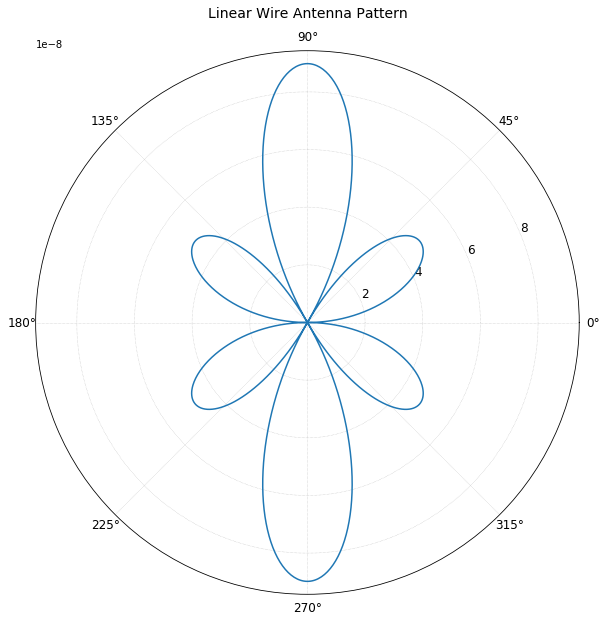

In [13]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Display the results

plt.polar(theta, abs(et), '')



# Set the plot title and labels

plt.title('Linear Wire Antenna Pattern', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)